In [51]:

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import joblib

In [2]:
# Print scikit-learn version to confirm compatibility
print(f"Scikit-learn version: {sklearn.__version__}")


Scikit-learn version: 1.3.1


In [41]:
# ✅ Load training data
X_train = np.load("../data/X_train.npy")
y_train = np.load("../data/y_train.npy")

# ✅ Print shapes before reshaping
print(f"✅ X_train shape before: {X_train.shape}")
print(f"✅ y_train shape before: {y_train.shape}")

✅ X_train shape before: (2316, 60, 1)
✅ y_train shape before: (2316, 1)


In [43]:
## ✅ Define correct save path
model_path = os.path.join("../results", "lstm_model_fixed.keras")


In [45]:
#  Build the LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(60, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

C:\Users\Himanshu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
## COPMLILE ANDF TRAIN

In [47]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [53]:
# ✅ Train the model with EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stop])


Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 2.1710e-04 - val_loss: 1.3544e-05
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 1.4801e-05 - val_loss: 1.5425e-05
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 1.2008e-05 - val_loss: 1.2795e-05
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 1.0226e-05 - val_loss: 1.6063e-05
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 9.1336e-06 - val_loss: 1.1708e-05
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 9.2045e-06 - val_loss: 1.8680e-05
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 9.5582e-06 - val_loss: 1.0678e-05
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 6.6920e-06 - val_loss: 1.1503e-05
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 7.3888e-06 - val_loss: 1.0308e-05
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 6.3422e-06 - val_loss: 1.0921e-05
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 7.4461e-0

In [ ]:
##model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


In [55]:
# ✅ Save the trained model
model.save(model_path)
print(f"✅ Model saved successfully at: {model_path}")


✅ Model saved successfully at: ../results\lstm_model_fixed.keras


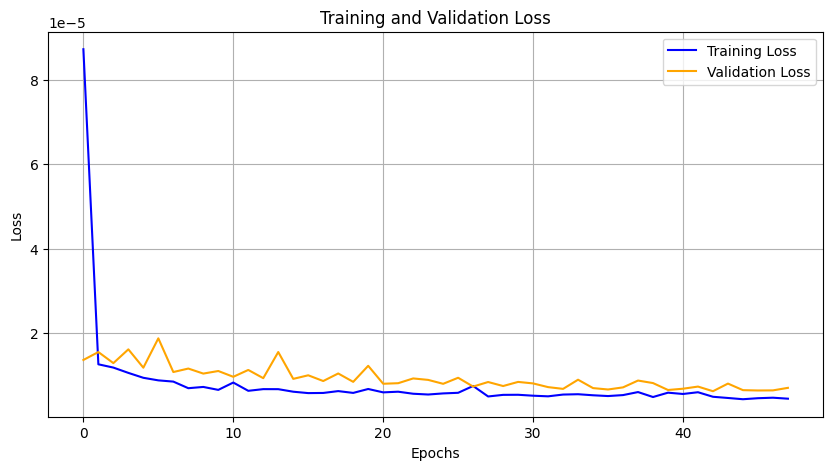

✅ Training vs Validation Loss plot saved successfully!


In [57]:
# ✅ Save training history plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color="blue")
plt.plot(history.history['val_loss'], label='Validation Loss', color="orange")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()
plt.savefig("../results/training_validation_loss.png")  # ✅ Save plot
plt.show()

print("✅ Training vs Validation Loss plot saved successfully!")


In [63]:
import joblib
from sklearn.preprocessing import MinMaxScaler

# Load existing scaler
scaler = joblib.load("../results/scaler.pkl")

# Re-save it with the correct version
joblib.dump(scaler, "../results/scaler.pkl")
print("✅ Scaler re-saved successfully!")


✅ Scaler re-saved successfully!
